In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-colorblind')
import seaborn as sns

In [102]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, recall_score, precision_score, confusion_matrix
from sklearn.preprocessing import  PolynomialFeatures, StandardScaler, MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score

In [2]:
df = pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


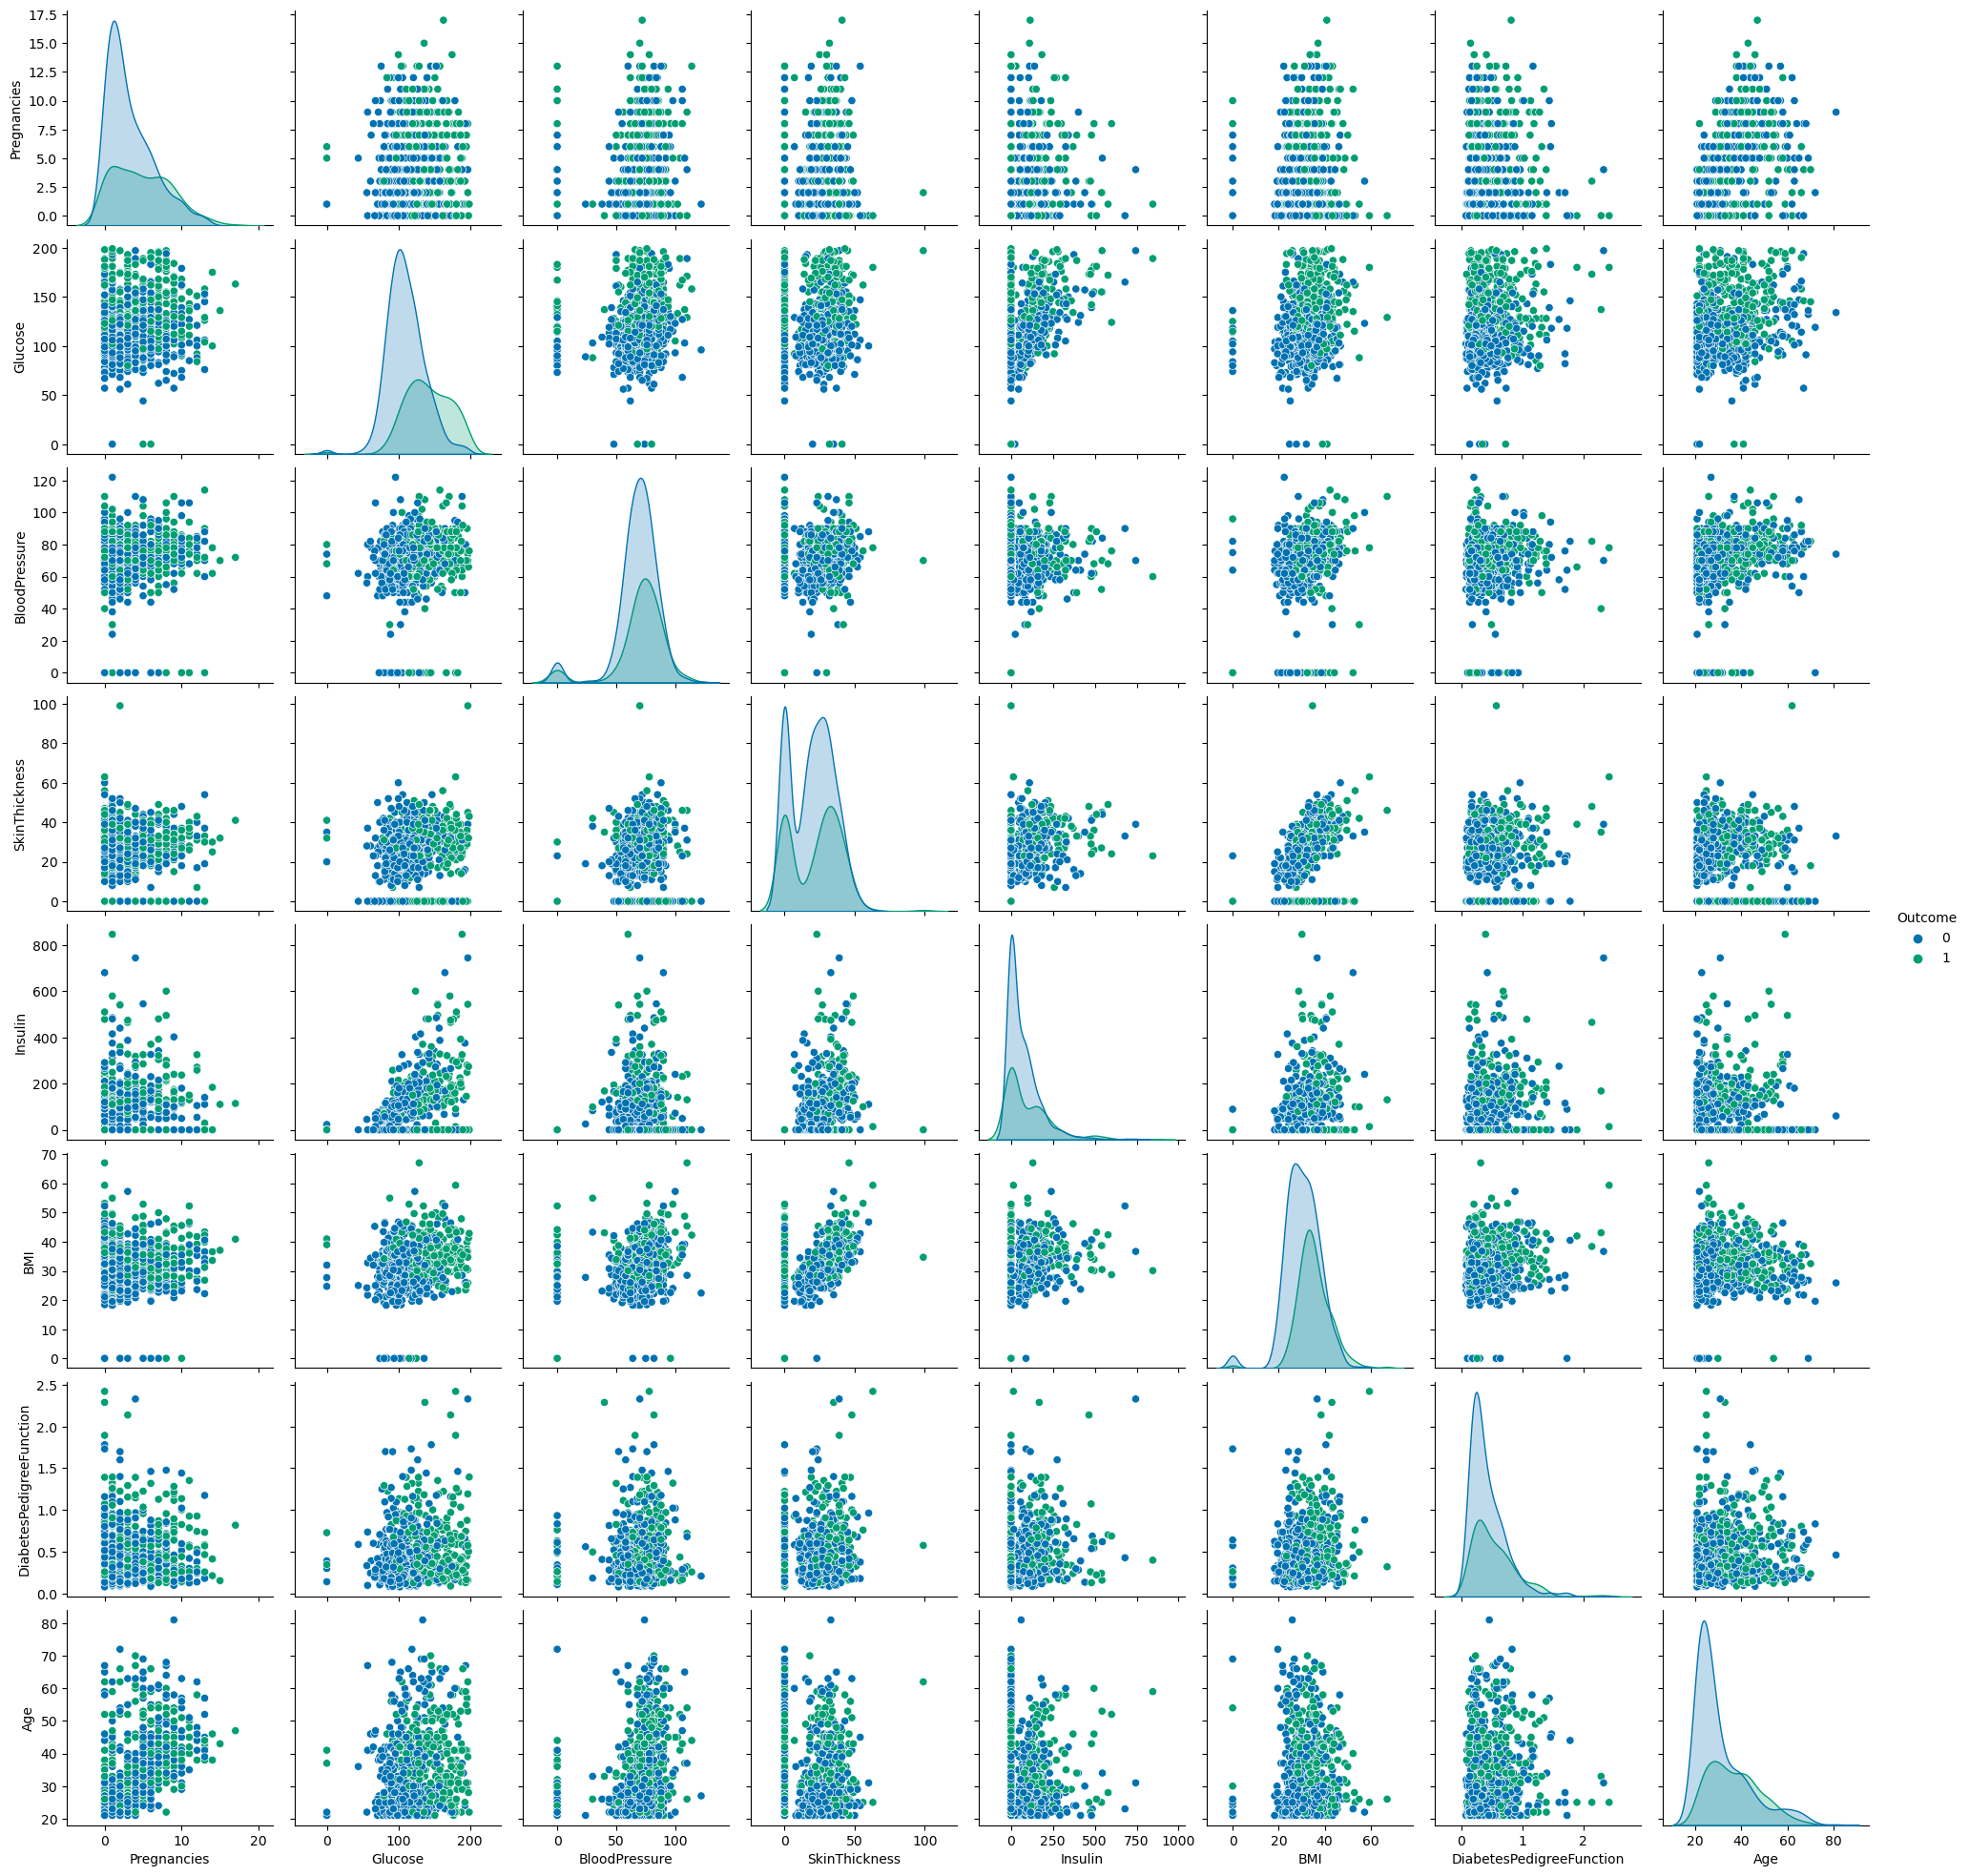

In [5]:
sns.pairplot(df, hue='Outcome')

Baseline model

In [22]:
X = df[['Glucose', 'BMI']]
y = df['Outcome']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3)

y_pred = np.zeros(y_val.shape)

print(f"The accuracy is {accuracy_score(y_val, y_pred)}")
print(f"The recall is {recall_score(y_val, y_pred)}")
print(f"The precision is {precision_score(y_val, y_pred)}")


The accuracy is 0.6363636363636364
The recall is 0.0
The precision is 0.0


c:\Users\nikhi_ntf2doa\anaconda3\envs\stm\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Logistic Regression using only Glucose and BMI

In [103]:
features = ['Glucose', 'BMI']
X = df[features]
y = df['Outcome']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3)

pipe = Pipeline([('scaler' , StandardScaler()),
('lr', LogisticRegression())])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_val)

print(f"The accuracy is {accuracy_score(y_val, y_pred)}")
print(f"The recall is {recall_score(y_val, y_pred)}")
print(f"The precision is {precision_score(y_val, y_pred)}")
print(f"The avg. CV score is {cross_val_score(pipe, X_train, y_train, cv=3).mean()}")

The accuracy is 0.7402597402597403
The recall is 0.5176470588235295
The precision is 0.6984126984126984
The avg. CV score is 0.7653631284916201


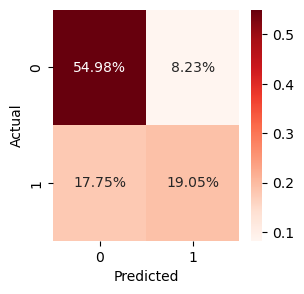

In [111]:
cf_matrix = confusion_matrix(y_val, y_pred)
fig, ax = plt.subplots(figsize=(3,3))
sns.heatmap(cf_matrix/np.sum(cf_matrix), ax=ax, annot=True, 
            fmt='.2%', cmap='Reds')
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
plt.show()

LR using All features

In [38]:
features = df.columns[:-1]
X = df[features]
y = df['Outcome']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3)

pipe = Pipeline([('scaler' , StandardScaler()),
('lr', LogisticRegression())])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_val)

print(f"The accuracy is {accuracy_score(y_val, y_pred)}")
print(f"The recall is {recall_score(y_val, y_pred)}")
print(f"The precision is {precision_score(y_val, y_pred)}")
print(f"The avg. CV score is {cross_val_score(pipe, X_train, y_train, cv=3).mean()}")

The accuracy is 0.7922077922077922
The recall is 0.5875
The precision is 0.7580645161290323
The avg. CV score is 0.7672253258845437


KNN

In [112]:
from sklearn.neighbors import KNeighborsClassifier

features = df.columns[:-1]
X = df[features]
y = df['Outcome']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3)

pipe = Pipeline([('scaler' , StandardScaler()),
('clf', KNeighborsClassifier(n_neighbors=5))])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_val)

print(f"The accuracy is {accuracy_score(y_val, y_pred)}")
print(f"The recall is {recall_score(y_val, y_pred)}")
print(f"The precision is {precision_score(y_val, y_pred)}")

print(f"The avg. CV score is {cross_val_score(pipe, X_train, y_train, cv=3).mean()}")

The accuracy is 0.696969696969697
The recall is 0.5287356321839081
The precision is 0.6133333333333333
The avg. CV score is 0.7392923649906891


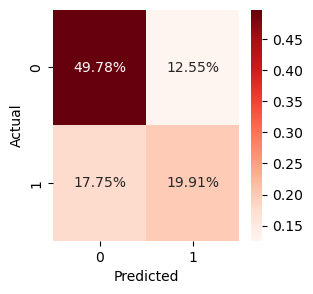

In [113]:
cf_matrix = confusion_matrix(y_val, y_pred)
fig, ax = plt.subplots(figsize=(3,3))
sns.heatmap(cf_matrix/np.sum(cf_matrix), ax=ax, annot=True, 
            fmt='.2%', cmap='Reds')
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
plt.show()

SVM

In [41]:
from sklearn.svm import SVC

In [42]:
features = df.columns[:-1]
X = df[features]
y = df['Outcome']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3)

pipe = Pipeline([('scaler' , StandardScaler()),
('clf', SVC())])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_val)

print(f"The accuracy is {accuracy_score(y_val, y_pred)}")
print(f"The recall is {recall_score(y_val, y_pred)}")
print(f"The precision is {precision_score(y_val, y_pred)}")

print(f"The avg. CV score is {cross_val_score(pipe, X_train, y_train, cv=3).mean()}")

The accuracy is 0.8008658008658008
The recall is 0.5342465753424658
The precision is 0.7647058823529411
The avg. CV score is 0.7430167597765364


SVM with RBF kernel

In [52]:
features = df.columns[:-1]
X = df[features]
y = df['Outcome']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3)

pipe = Pipeline([('scaler' , StandardScaler()),
('clf', SVC(gamma=2, C=1))])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_val)

print(f"The accuracy is {accuracy_score(y_val, y_pred)}")
print(f"The recall is {recall_score(y_val, y_pred)}")
print(f"The precision is {precision_score(y_val, y_pred)}")

print(f"The avg. CV score is {cross_val_score(pipe, X_train, y_train, cv=3).mean()}")

The accuracy is 0.645021645021645
The recall is 0.04878048780487805
The precision is 0.5
The avg. CV score is 0.6480446927374302


Decision trees

In [39]:
from sklearn.tree import DecisionTreeClassifier

features = df.columns[:-1]
X = df[features]
y = df['Outcome']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3)

pipe = Pipeline([('scaler' , StandardScaler()),
('clf', DecisionTreeClassifier())])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_val)

print(f"The accuracy is {accuracy_score(y_val, y_pred)}")
print(f"The recall is {recall_score(y_val, y_pred)}")
print(f"The precision is {precision_score(y_val, y_pred)}")

print(f"The avg. CV score is {cross_val_score(pipe, X_train, y_train, cv=3).mean()}")

The accuracy is 0.7056277056277056
The recall is 0.6071428571428571
The precision is 0.5930232558139535
The avg. CV score is 0.6834264432029795


Random Forest

In [114]:
from sklearn.ensemble import RandomForestClassifier

features = df.columns[:-1]
X = df[features]
y = df['Outcome']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3)

pipe = Pipeline([('scaler' , StandardScaler()),
('clf',RandomForestClassifier())])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_val)

print(f"The accuracy is {accuracy_score(y_val, y_pred)}")
print(f"The recall is {recall_score(y_val, y_pred)}")
print(f"The precision is {precision_score(y_val, y_pred)}")

print(f"The avg. CV score is {cross_val_score(pipe, X_train, y_train, cv=3).mean()}")

The accuracy is 0.7748917748917749
The recall is 0.5925925925925926
The precision is 0.7164179104477612
The avg. CV score is 0.7113594040968342


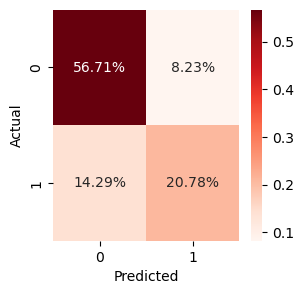

In [115]:
cf_matrix = confusion_matrix(y_val, y_pred)
fig, ax = plt.subplots(figsize=(3,3))
sns.heatmap(cf_matrix/np.sum(cf_matrix), ax=ax, annot=True, 
            fmt='.2%', cmap='Reds')
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
plt.show()

In [44]:
pipe['clf'].feature_importances_

array([0.08088873, 0.26496946, 0.0936422 , 0.07355995, 0.06589787,
       0.16825911, 0.12861713, 0.12416556])

In [46]:
df.columns[:-1]

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')

Model with only the most important features

In [116]:
features = ['Glucose', 'BMI', 'DiabetesPedigreeFunction', 'Age']
X = df[features]
y = df['Outcome']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3)

pipe = Pipeline([('scaler' , StandardScaler()),
('clf',RandomForestClassifier())])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_val)

print(f"The accuracy is {accuracy_score(y_val, y_pred)}")
print(f"The recall is {recall_score(y_val, y_pred)}")
print(f"The precision is {precision_score(y_val, y_pred)}")

print(f"The avg. CV score is {cross_val_score(pipe, X_train, y_train, cv=3).mean()}")

The accuracy is 0.7532467532467533
The recall is 0.5569620253164557
The precision is 0.6666666666666666
The avg. CV score is 0.7579143389199254


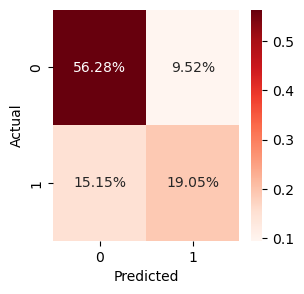

In [117]:
cf_matrix = confusion_matrix(y_val, y_pred)
fig, ax = plt.subplots(figsize=(3,3))
sns.heatmap(cf_matrix/np.sum(cf_matrix), ax=ax, annot=True, 
            fmt='.2%', cmap='Reds')
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
plt.show()

adaBoost

In [65]:
from sklearn.ensemble import AdaBoostClassifier

features = df.columns[:-1]
X = df[features]
y = df['Outcome']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3)

pipe = Pipeline([('scaler' , StandardScaler()),
('clf',AdaBoostClassifier())])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_val)

print(f"The accuracy is {accuracy_score(y_val, y_pred)}")
print(f"The recall is {recall_score(y_val, y_pred)}")
print(f"The precision is {precision_score(y_val, y_pred)}")

print(f"The avg. CV score is {cross_val_score(pipe, X_train, y_train, cv=3).mean()}")

The accuracy is 0.7705627705627706
The recall is 0.631578947368421
The precision is 0.6575342465753424
The avg. CV score is 0.7430167597765364


XGBoost

In [124]:
from xgboost import XGBClassifier

features = df.columns[:-1]
X = df[features]
y = df['Outcome']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3)

pipe = Pipeline([('scaler' , StandardScaler()),
('clf',XGBClassifier())])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_val)

print(f"The accuracy is {accuracy_score(y_val, y_pred)}")
print(f"The recall is {recall_score(y_val, y_pred)}")
print(f"The precision is {precision_score(y_val, y_pred)}")

print(f"The avg. CV score is {cross_val_score(pipe, X_train, y_train, cv=3).mean()}")


The accuracy is 0.7316017316017316
The recall is 0.6027397260273972
The precision is 0.5714285714285714
The avg. CV score is 0.7206703910614526


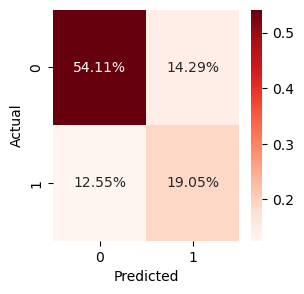

In [125]:
cf_matrix = confusion_matrix(y_val, y_pred)
fig, ax = plt.subplots(figsize=(3,3))
sns.heatmap(cf_matrix/np.sum(cf_matrix), ax=ax, annot=True, 
            fmt='.2%', cmap='Reds')
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
plt.show()

Neural Network

In [122]:
from sklearn.neural_network import MLPClassifier
features = df.columns[:-1]
X = df[features]
y = df['Outcome']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3)

pipe = Pipeline([('scaler' , StandardScaler()),
('clf',MLPClassifier(random_state=1, max_iter=500,
        learning_rate_init= 0.2))])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_val)

print(f"The accuracy is {accuracy_score(y_val, y_pred)}")
print(f"The recall is {recall_score(y_val, y_pred)}")
print(f"The precision is {precision_score(y_val, y_pred)}")

print(f"The avg. CV score is {cross_val_score(pipe, X_train, y_train, cv=3).mean()}")

The accuracy is 0.7056277056277056
The recall is 0.5301204819277109
The precision is 0.6027397260273972
The avg. CV score is 0.7113594040968342


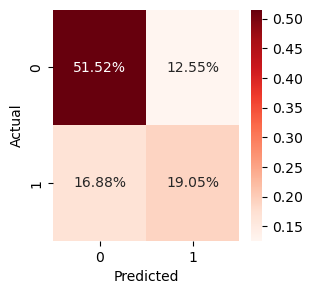

In [123]:
cf_matrix = confusion_matrix(y_val, y_pred)
fig, ax = plt.subplots(figsize=(3,3))
sns.heatmap(cf_matrix/np.sum(cf_matrix), ax=ax, annot=True, 
            fmt='.2%', cmap='Reds')
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
plt.show()

Dim. reduction  : PCA

In [118]:
from sklearn.decomposition import PCA
features = df.columns[:-1]
X = df[features]
y = df['Outcome']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3)

pipe = Pipeline([('scaler' , StandardScaler()),
('pca',PCA(n_components=4)),
('lr', LogisticRegression())])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_val)

print(f"The accuracy is {accuracy_score(y_val, y_pred)}")
print(f"The recall is {recall_score(y_val, y_pred)}")
print(f"The precision is {precision_score(y_val, y_pred)}")
print(f"The avg. CV score is {cross_val_score(pipe, X_train, y_train, cv=3).mean()}")

The accuracy is 0.7316017316017316
The recall is 0.391304347826087
The precision is 0.574468085106383
The avg. CV score is 0.7150837988826816


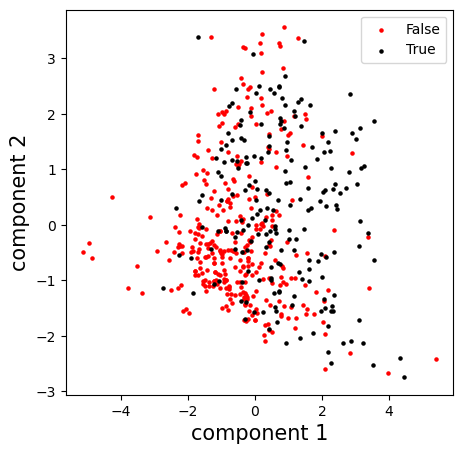

In [119]:
XX = pipe['pca'].transform(pipe['scaler'].transform(X_train))

component1_F=XX[(y_train==0), 0]
component1_T=XX[(y_train==1), 0]
component2_F=XX[(y_train==0), 1]
component2_T=XX[(y_train==1), 1]

fig, ax = plt.subplots(figsize= (5,5))
ax.scatter(component1_F, component2_F, s=5, c='r', label='False')
ax.scatter(component1_T, component2_T, s=5, c='k', label='True')

ax.set_xlabel('component 1', size=15)
ax.set_ylabel('component 2', size=15)

ax.legend()
plt.show()

In [120]:
print(f"explained variance ratio (first two components): {pca.explained_variance_ratio_}")

explained variance ratio (first two components): [0.25982289 0.21969886]


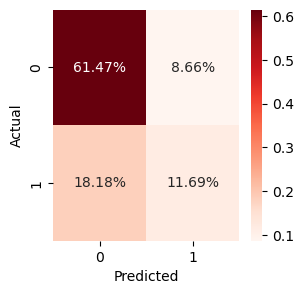

In [121]:
cf_matrix = confusion_matrix(y_val, y_pred)
fig, ax = plt.subplots(figsize=(3,3))
sns.heatmap(cf_matrix/np.sum(cf_matrix), ax=ax, annot=True, 
            fmt='.2%', cmap='Reds')
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
plt.show()